In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from orphics import maps, stats, cosmology
import pandas as pd

import sys, os
sys.path.append("/global/homes/h/hongbo/tools/cmblensplus/wrap")
import curvedsky
from math import pi
import matplotlib as mpl
mpl.rcParams['font.size']=13

sys.path.append(os.path.dirname(os.getcwd()))     

import param as p
from math import pi

import matplotlib as mpl
mpl.rcParams['font.size']=12

In [2]:
class bin1D(object):
    def __init__(self, ls, bin_edges):
        self.centers = (bin_edges[1:]+bin_edges[:-1])/2.
        self.digitized = np.digitize(ls, bin_edges,right=True)
        self.bin_edges = bin_edges
    def bin(self,data1d,weights=None):
        if weights is None:
            res = np.bincount(self.digitized,(data1d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
        else:
            res = np.bincount(self.digitized,(data1d*weights).reshape(-1))[1:-1]/np.bincount(self.digitized,weights.reshape(-1))[1:-1]
        return self.centers,res

In [35]:
# exps_config = {
#     'Planck_SMICA': {
#         'nlev_t': 45,
#         'nlev_p':45*2**0.5,
#         'beam_arcmin': 5
#     },
#     'CMB_S3': {
#         'nlev_t': 7,
#         'nlev_p': 7*2**0.5,
#         'beam_arcmin': 1.4
#     },
#     'CMB_S4': {
#         'nlev_t': 1,
#         'nlev_p':2**0.5,
#         'beam_arcmin': 3
#     }
# }

exps_config = {
    'CMB_S3': {
        'nlev_t': 7,
        'nlev_p': 7*2**0.5,
        'beam_arcmin': 1.4
    },
    'CMB_S4': {
        'nlev_t': 1,
        'nlev_p':2**0.5,
        'beam_arcmin': 3
    }
}

exps_config = {
    'CMB_S4': {
        'nlev_t': 1,
        'nlev_p':2**0.5,
        'beam_arcmin': 3
    }
}

moments = {'moments1':{'ellmin':30, 'ellmax':3000, 'delta_L':150},\
           'moments2':{'ellmin':30, 'ellmax':4000, 'delta_L':200}}
ellmin = 30
ls = np.arange(0, 6001)

In [25]:
data = pd.read_csv(f'../output/recon_ps/CMB_S4_0_30_3000_n.csv')

In [27]:
data

,EB_inkap_x_inkap,EB_inkap_x_reckap,EB_rot_inkap_x_reckap,EB_reckap_x_reckap,EB_rot_reckap_x_reckap,EB_rdn0,EB_rot_rdn0
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.870077e-08,4.606788e-08,4.207788e-08,8.154223e-08,6.796267e-08,1.652476e-08,1.728472e-08
3,3.208396e-08,4.681157e-08,4.650072e-08,7.512626e-08,7.611021e-08,1.321967e-08,1.382797e-08
4,7.771518e-08,6.608217e-08,6.206409e-08,8.389490e-08,8.026280e-08,1.224086e-08,1.280382e-08
...,...,...,...,...,...,...,...
2996,1.711390e-09,1.936368e-09,1.920986e-09,2.016543e-07,2.022258e-07,1.920061e-07,1.951361e-07
2997,1.666584e-09,2.383155e-09,2.372602e-09,2.081941e-07,2.095560e-07,1.920988e-07,1.952266e-07
2998,1.766773e-09,1.608861e-09,1.601275e-09,2.009670e-07,2.020886e-07,1.921916e-07,1.953180e-07
2999,1.694474e-09,1.557760e-09,1.561929e-09,2.008732e-07,2.011526e-07,1.922847e-07,1.954089e-07


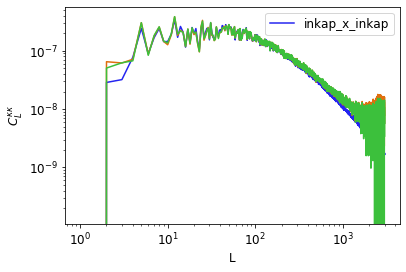

In [26]:
ells = np.arange(0, 3001)
# plt.plot(ells, data['EB_reckap_x_reckap'][ells], label='CMB_S4, 3000')
# plt.plot(ells, data['EB_rot_reckap_x_reckap'][ells], label='CMB_S4, 3000, rot')

# plt.plot(ells, data['EB_inkap_x_reckap'][ells], label='CMB_S4, 3000')
# plt.plot(ells, data['EB_rot_inkap_x_reckap'][ells], label='CMB_S4, 3000, rot')
plt.plot(ells, data['EB_inkap_x_inkap'][ells], label='inkap_x_inkap')
plt.plot(ells, data['EB_reckap_x_reckap'][ells]-data['EB_rdn0'][ells])
plt.plot(ells, data['EB_rot_reckap_x_reckap'][ells]-data['EB_rot_rdn0'][ells])

plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [32]:
if 1:
    exp = 'CMB_S4'
    ellmax = 3000
    sim_num1, sim_num2 = 0,100
    Ls = np.arange(0, ellmax+1)
    
    EB_inkap_x_inkaps = []
    EB_inkap_x_reckaps = []
    EB_rot_inkap_x_reckaps = []

    EB_reckap_x_reckaps = []
    EB_rot_reckap_x_reckaps = []
    
    EB_rdn0s = []
    EB_rot_rdn0s = []

    for isim in range(sim_num1, sim_num2):
        recon_ps = pd.read_csv(f'../output/recon_ps/%s_{isim}_30_%s_n.csv'%(exp,ellmax))
        EB_inkap_x_inkaps.append(recon_ps['EB_inkap_x_inkap'])
        EB_inkap_x_reckaps.append(recon_ps['EB_inkap_x_reckap'])
        EB_rot_inkap_x_reckaps.append(recon_ps['EB_rot_inkap_x_reckap'])

        EB_reckap_x_reckaps.append(recon_ps['EB_reckap_x_reckap'])
        EB_rot_reckap_x_reckaps.append(recon_ps['EB_rot_reckap_x_reckap'])
        
        EB_rdn0s.append(recon_ps['EB_rdn0'])
        EB_rot_rdn0s.append(recon_ps['EB_rot_rdn0'])


    EB_inkap_x_inkaps = np.array(EB_inkap_x_inkaps)
    EB_inkap_x_reckaps = np.array(EB_inkap_x_reckaps)
    EB_rot_inkap_x_reckaps = np.array(EB_rot_inkap_x_reckaps)

    EB_reckap_x_reckaps = np.array(EB_reckap_x_reckaps)
    EB_rot_reckap_x_reckaps = np.array(EB_rot_reckap_x_reckaps)
    
    EB_rdn0s = np.array(EB_rdn0s)
    EB_rot_rdn0s = np.array(EB_rot_rdn0s)
    
    data_dict = {}
    data_dict['L'] = Ls
    data_dict['EB_inkap_x_inkap'] = np.mean(EB_inkap_x_inkaps, axis=0)
    data_dict['EB_inkap_x_reckap'] = np.mean(EB_inkap_x_reckaps, axis=0)
    data_dict['EB_rot_inkap_x_reckap'] = np.mean(EB_rot_inkap_x_reckaps, axis=0)
    data_dict['EB_reckap_x_reckap'] = np.mean(EB_reckap_x_reckaps, axis=0)
    data_dict['EB_rot_reckap_x_reckap'] = np.mean(EB_rot_reckap_x_reckaps, axis=0)
    
    data_dict['EB_rdn0'] = np.mean(EB_rdn0s, axis=0)
    data_dict['EB_rot_rdn0'] = np.mean(EB_rot_rdn0s, axis=0)
    # data_dict = {'L':Ls,
    #     'EB_inkap_x_inkap':EB_inkap_x_inkaps, 'EB_inkap_x_reckap':EB_inkap_x_reckaps,\
    #             'EB_rot_inkap_x_reckap':EB_rot_inkap_x_reckaps, 'EB_reckap_x_reckap':EB_reckap_x_reckaps,\
    #             'EB_rot_reckap_x_reckap':EB_rot_reckap_x_reckaps}
    data_df = pd.DataFrame(data_dict)
    data_df.to_csv('./%s_30_%s_n.csv'%(exp,ellmax),index=False)

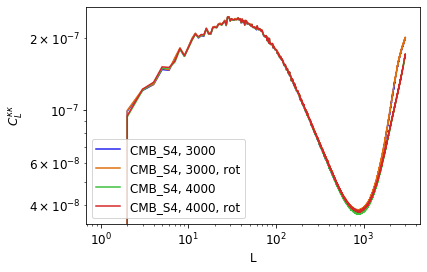

In [36]:
if 1:
    ellmaxs = [3000, 4000]
    ells = np.arange(0, 3001)
    for exp in exps_config:
        for ellmax in ellmaxs:
            data = pd.read_csv('./%s_30_%s_n.csv'%(exp,ellmax))
            # plt.plot(ells, data['EB_inkap_x_inkap'][ells])
            # plt.plot(ells, data['EB_inkap_x_reckap'][ells])
            # plt.plot(ells, data['EB_rot_inkap_x_reckap'][ells])

            plt.plot(ells, data['EB_reckap_x_reckap'][ells], label='%s, %s'%(exp,ellmax))
            plt.plot(ells, data['EB_rot_reckap_x_reckap'][ells], label='%s, %s, rot'%(exp,ellmax))
    plt.xlabel('L')
    plt.ylabel('$C_L^{\kappa\kappa}$')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

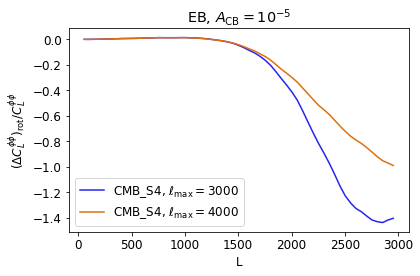

In [37]:
teb_cls = pd.read_csv('./teb_cls.csv')
rot_teb_cls = pd.read_csv('./rot_teb_cls.csv')

ellmaxs = [3000, 4000]
ellmax_plot = 3000
ells_plot = np.arange(0, ellmax_plot+1)

theory = cosmology.default_theory()
clee = theory.lCl('EE', ls)                                                                                                                                                                   
clbb = theory.lCl('BB', ls)



for exp, param in exps_config.items():
    for ellmax in ellmaxs:
        data = pd.read_csv('./%s_30_%s_n.csv'%(exp,ellmax))
        # plt.plot(ells, data['EB_inkap_x_inkap'][ells])
        # plt.plot(ells, data['EB_inkap_x_reckap'][ells])
        # plt.plot(ells, data['EB_rot_inkap_x_reckap'][ells])
        imax = ellmax+1
        ells = np.arange(0, ellmax+1)
        nlee = (param['nlev_p']*np.pi/180/60)**2/maps.gauss_beam(ls, param['beam_arcmin'])**2
        
        oclee = teb_cls['EE'] + nlee
        oclbb = teb_cls['BB'] + nlee
        rot_oclee = rot_teb_cls['EE'] + nlee
        rot_oclbb = rot_teb_cls['BB'] + nlee
        
        n0 = curvedsky.norm_quad.qeb('lens', ellmax, ellmin, \
                             ellmax,clee[:imax], oclee[:imax], oclbb[:imax], lfac='k')[0]
        
        n0_rot = curvedsky.norm_quad.qeb('lens', ellmax, ellmin, \
                                 ellmax,clee[:imax], rot_oclee[:imax], rot_oclbb[:imax], lfac='k')[0]
        
        
        bias = ((data['EB_rot_reckap_x_reckap']-data['EB_reckap_x_reckap'])-(n0_rot-n0))/\
                 data['EB_inkap_x_inkap']
        
        bin_edge = np.arange(ellmin, ellmax_plot, 50)
        binner = bin1D(ells_plot, bin_edge)
        
        L_bin, bias_bin = binner.bin(np.array(bias[ells_plot]))
        plt.plot(L_bin, bias_bin, label=r'%s, $\ell_{\mathrm{max}}=%s$'%(exp,ellmax))
        
plt.title(r'EB, $A_{\mathrm{CB}}=10^{-5}$')       
plt.xlabel('L')
plt.ylabel('$({\Delta}C_L^{\phi \phi})_{\mathrm{rot}}/C_L^{\phi \phi}$')
plt.legend()
plt.tight_layout()
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('./bias.png')
plt.savefig('./bias.pdf')

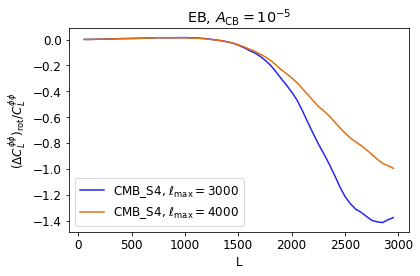

In [39]:
ellmaxs = [3000, 4000]
ellmax_plot = 3000
ells_plot = np.arange(0, ellmax_plot+1)

theory = cosmology.default_theory()
clee = theory.lCl('EE', ls)                                                                                                                                                                   
clbb = theory.lCl('BB', ls)



for exp, param in exps_config.items():
    for ellmax in ellmaxs:
        data = pd.read_csv('./%s_30_%s_n.csv'%(exp,ellmax))
        # plt.plot(ells, data['EB_inkap_x_inkap'][ells])
        # plt.plot(ells, data['EB_inkap_x_reckap'][ells])
        # plt.plot(ells, data['EB_rot_inkap_x_reckap'][ells])
        
        bias = ((data['EB_rot_reckap_x_reckap']-data['EB_reckap_x_reckap'])-(data['EB_rot_rdn0']-data['EB_rdn0']))/\
                 data['EB_inkap_x_inkap']
        
        bin_edge = np.arange(ellmin, ellmax_plot, 50)
        binner = bin1D(ells_plot, bin_edge)
        
        L_bin, bias_bin = binner.bin(np.array(bias[ells_plot]))
        plt.plot(L_bin, bias_bin, label=r'%s, $\ell_{\mathrm{max}}=%s$'%(exp,ellmax))
        
plt.title(r'EB, $A_{\mathrm{CB}}=10^{-5}$')       
plt.xlabel('L')
plt.ylabel('$({\Delta}C_L^{\phi \phi})_{\mathrm{rot}}/C_L^{\phi \phi}$')
plt.legend()
plt.tight_layout()
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('./bias.png')
plt.savefig('./bias.pdf')